# Jean's bare bones template

In [1]:
#!pip install --upgrade pip
#!pip install numpy pandas matplotlib matplotlib-inline scikit-learn umap-learn

  Using cached pip-24.0-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-24.0-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 23.3.1
    Uninstalling pip-23.3.1:
      Successfully uninstalled pip-23.3.1
  Using cached numpy-1.26.4-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached pandas-2.2.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (19 kB)
  Using cached matplotlib-3.8.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.8 kB)
  Using cached scikit_learn-1.4.0-1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached umap_learn-0.5.5-py3-none-any.whl
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.2.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any

In [2]:
# import modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

/tmp/ipykernel_3969906/3068389489.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Linked datasets
The following datasets were symlinked to the workspace when this template was added:

In [3]:
# linked datasets
uuid = '2c70846a788a7b6900992b4ed310574d'
root_folder = '.'

## Read in data

In [4]:
# mean intensity of pixel intensities for all parts of each cell for all channels
df_expression_file = 'sprm_outputs/reg1_stitched_expressions.ome.tiff-cell_channel_meanAll.csv'
df_expression = pd.read_csv(root_folder + '/datasets/' + uuid + '/' + df_expression_file)

# pixel coordinates of cell centers of each segmented cell
df_location_file = 'sprm_outputs/reg1_stitched_expressions.ome.tiff-cell_centers.csv'
df_location = pd.read_csv(root_folder + '/datasets/' + uuid + '/' + df_location_file)

In [5]:
df_expression

,ID,CD107a,CD11c,CD15,CD163,CD1c,CD20,CD21,CD31,CD34,...,DAPI-02,ECAD,FoxP3,HLA-DR,Ki67,Lyve1,PanCK,Podoplanin,SMActin,Vimentin
0,195,0.482759,1.034483,2.034483,0.827586,1.068966,0.103448,0.931034,0.793103,0.724138,...,1.137931,0.965517,1.034483,0.896552,1.172414,0.448276,0.724138,0.862069,0.000000,0.620690
1,237,0.451613,0.000000,0.000000,0.225806,0.000000,0.000000,0.000000,0.709677,0.032258,...,1.258065,0.000000,0.000000,0.000000,0.000000,0.258065,0.064516,0.000000,0.000000,0.387097
2,246,1.260870,0.956522,1.434783,1.130435,1.043478,0.260870,0.739130,1.173913,0.913043,...,0.956522,0.695652,0.739130,0.826087,0.826087,1.869565,0.478261,0.608696,0.000000,4.782609
3,257,0.000000,0.000000,2.918919,0.000000,0.000000,2.216216,0.000000,0.108108,0.891892,...,2.675676,0.000000,0.000000,0.432432,0.000000,0.000000,0.270270,0.000000,0.000000,0.027027
4,258,0.000000,0.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.200000,1.240000,...,2.520000,0.080000,0.000000,0.000000,0.000000,0.160000,0.200000,0.000000,0.000000,0.440000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132135,133011,1.000000,0.961538,0.000000,1.000000,0.961538,0.000000,1.000000,0.423077,0.500000,...,0.884615,1.000000,1.000000,0.846154,1.000000,0.038462,0.769231,1.000000,0.461538,0.000000
132136,133023,0.863636,1.000000,1.818182,1.000000,1.000000,1.500000,1.000000,0.090909,0.590909,...,1.409091,1.000000,1.000000,1.000000,1.000000,0.000000,0.545455,1.000000,0.000000,0.500000
132137,133046,0.045455,0.045455,1.000000,0.363636,0.045455,0.000000,0.045455,0.272727,0.136364,...,1.681818,0.045455,0.136364,0.090909,1.000000,0.000000,0.272727,0.000000,0.000000,0.000000
132138,133091,0.473684,0.000000,0.000000,0.052632,0.000000,0.000000,0.000000,0.789474,2.421053,...,1.526316,0.000000,0.000000,0.000000,0.000000,1.210526,0.210526,0.000000,0.000000,0.578947


In [6]:
df_location

,ID,x,y
0,0,0.0,0.0
1,1,3.0,6897.0
2,2,3.0,6411.0
3,3,4.0,7468.0
4,4,4.0,7896.0
...,...,...,...
133240,133240,9486.0,1719.0
133241,133241,9486.0,8723.0
133242,133242,9486.0,7079.0
133243,133243,9486.0,3565.0


In [7]:
# Subset location to same set of cells we have expression for
df_subset = df_location[df_location['ID'].isin(df_expression['ID'])]
df_subset

,ID,x,y
195,195,11.0,1622.0
237,237,13.0,6903.0
246,246,13.0,2365.0
257,257,15.0,7894.0
258,258,15.0,4301.0
...,...,...,...
133011,133011,9477.0,498.0
133023,133023,9477.0,252.0
133046,133046,9478.0,3530.0
133091,133091,9480.0,8942.0


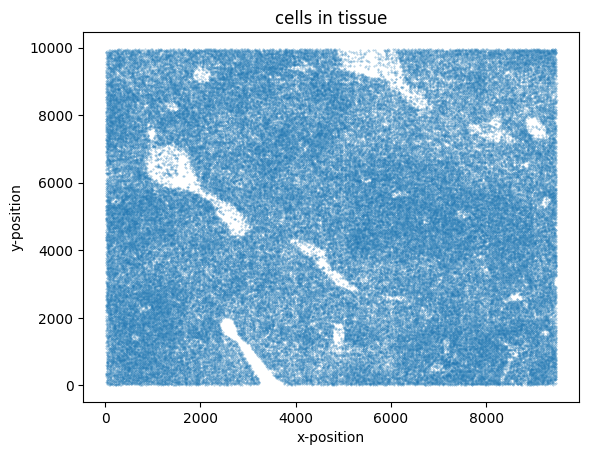

In [8]:
# visualize data as scatterplot
plt.scatter(df_subset['x'], df_subset['y'], marker='.', s = 0.5, alpha = 0.5)

# Add labels and title
plt.xlabel('x-position')
plt.ylabel('y-position')
plt.title('cells in tissue')

# Display the plot
plt.show()

## QC

In [9]:
# Remove cellID to just get protein expression
X = df_expression.drop(df_expression.columns[0], axis=1)
X

,CD107a,CD11c,CD15,CD163,CD1c,CD20,CD21,CD31,CD34,CD35,...,DAPI-02,ECAD,FoxP3,HLA-DR,Ki67,Lyve1,PanCK,Podoplanin,SMActin,Vimentin
0,0.482759,1.034483,2.034483,0.827586,1.068966,0.103448,0.931034,0.793103,0.724138,0.758621,...,1.137931,0.965517,1.034483,0.896552,1.172414,0.448276,0.724138,0.862069,0.000000,0.620690
1,0.451613,0.000000,0.000000,0.225806,0.000000,0.000000,0.000000,0.709677,0.032258,0.000000,...,1.258065,0.000000,0.000000,0.000000,0.000000,0.258065,0.064516,0.000000,0.000000,0.387097
2,1.260870,0.956522,1.434783,1.130435,1.043478,0.260870,0.739130,1.173913,0.913043,0.739130,...,0.956522,0.695652,0.739130,0.826087,0.826087,1.869565,0.478261,0.608696,0.000000,4.782609
3,0.000000,0.000000,2.918919,0.000000,0.000000,2.216216,0.000000,0.108108,0.891892,0.324324,...,2.675676,0.000000,0.000000,0.432432,0.000000,0.000000,0.270270,0.000000,0.000000,0.027027
4,0.000000,0.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.200000,1.240000,0.560000,...,2.520000,0.080000,0.000000,0.000000,0.000000,0.160000,0.200000,0.000000,0.000000,0.440000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132135,1.000000,0.961538,0.000000,1.000000,0.961538,0.000000,1.000000,0.423077,0.500000,0.538462,...,0.884615,1.000000,1.000000,0.846154,1.000000,0.038462,0.769231,1.000000,0.461538,0.000000
132136,0.863636,1.000000,1.818182,1.000000,1.000000,1.500000,1.000000,0.090909,0.590909,0.909091,...,1.409091,1.000000,1.000000,1.000000,1.000000,0.000000,0.545455,1.000000,0.000000,0.500000
132137,0.045455,0.045455,1.000000,0.363636,0.045455,0.000000,0.045455,0.272727,0.136364,0.090909,...,1.681818,0.045455,0.136364,0.090909,1.000000,0.000000,0.272727,0.000000,0.000000,0.000000
132138,0.473684,0.000000,0.000000,0.052632,0.000000,0.000000,0.000000,0.789474,2.421053,0.052632,...,1.526316,0.000000,0.000000,0.000000,0.000000,1.210526,0.210526,0.000000,0.000000,0.578947


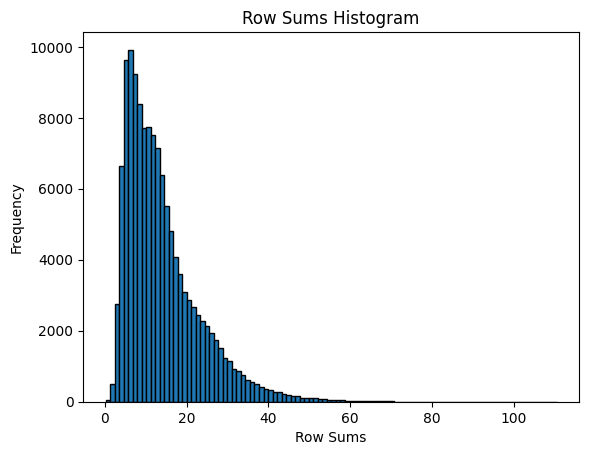

In [10]:
# Double check distribution of total proteins detected per cell
row_sums = X.sum(axis=1)

# Visualize results as a histogram
plt.hist(row_sums, bins=100, edgecolor='black')
plt.xlabel('Row Sums')
plt.ylabel('Frequency')
plt.title('Row Sums Histogram')
plt.show()

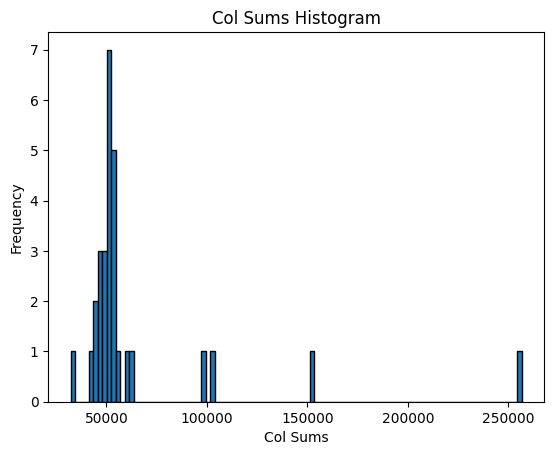

In [11]:
# Double check protein expression across all cells
col_sums = X.sum(axis=0)

# Visualize results as a histogram
plt.hist(col_sums, bins=100, edgecolor='black')
plt.xlabel('Col Sums')
plt.ylabel('Frequency')
plt.title('Col Sums Histogram')
plt.show()

## Normalize data

In [12]:
# Apply StandardScaler so all proteins have mean 0 and var 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.transpose()).transpose()
X_scaled

array([[-1.09986784,  0.35824267,  3.00106797, ..., -0.09741687,
        -2.37571454, -0.73534022],
       [ 1.22473135, -0.42723187, -0.42723187, ..., -0.42723187,
        -0.42723187,  0.98873661],
       [ 0.30855831, -0.07571983,  0.52814583, ..., -0.51489486,
        -1.28345115,  4.75520543],
       ...,
       [-0.40950809, -0.40950809,  2.13529218, ..., -0.53068905,
        -0.53068905, -0.53068905],
       [ 0.39649279, -0.45174178, -0.45174178, ..., -0.45174178,
        -0.45174178,  0.58498936],
       [-0.88273092,  0.82021993, -0.71792923, ...,  0.71035214,
        -2.09127669, -1.21233431]])

In [13]:
# Double check my normalization 
print(X_scaled.mean(axis=1)) # close to 0
print(X_scaled.var(axis=1)) # 1

[-3.29238552e-16  1.14850658e-17 -3.06268421e-17 ...  6.89103946e-17
  3.44551973e-17 -1.07193947e-16]
[1. 1. 1. ... 1. 1. 1.]


## Dimensionality reduction

In [14]:
# PCA
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)
X_pca

array([[ 3.26798405,  1.80051704, -2.82544725, ..., -0.73087137,
         1.20828234, -0.64143126],
       [ 0.53634404, -1.82527591,  1.89470791, ...,  0.33633123,
         1.20185906, -0.93638437],
       [ 1.49328876, -0.0865544 ,  2.42641584, ..., -1.37837245,
        -1.4459965 , -1.67918208],
       ...,
       [ 0.79499146, -1.09200989, -1.70399665, ..., -0.24826379,
         1.23452347, -0.40412937],
       [-0.26736062, -2.25540001,  2.53222436, ..., -0.04812691,
        -0.27732013,  0.83438211],
       [ 3.57505177,  5.45721327,  0.07853933, ...,  0.53637763,
        -0.20115312, -0.08066834]])

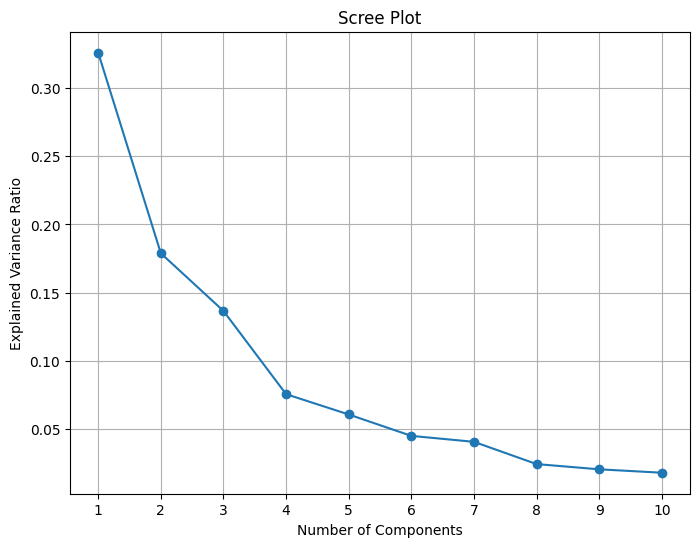

In [15]:
# Scree plot
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.xticks(np.arange(1, len(pca.explained_variance_ratio_) + 1))
plt.grid(True)
plt.show()

In [16]:
import umap

# Run UMAP
umap_reducer = umap.UMAP()
umap_data = umap_reducer.fit_transform(X_pca)

## Kmeans clustering

In [17]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=8, random_state=42)
labels = kmeans.fit_predict(X_pca)
labels

array([3, 0, 5, ..., 6, 4, 3], dtype=int32)

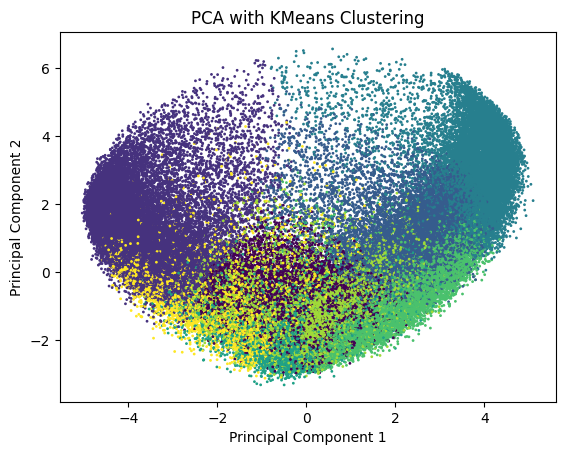

In [18]:
# Plot on PCs
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, s=1)
plt.title('PCA with KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

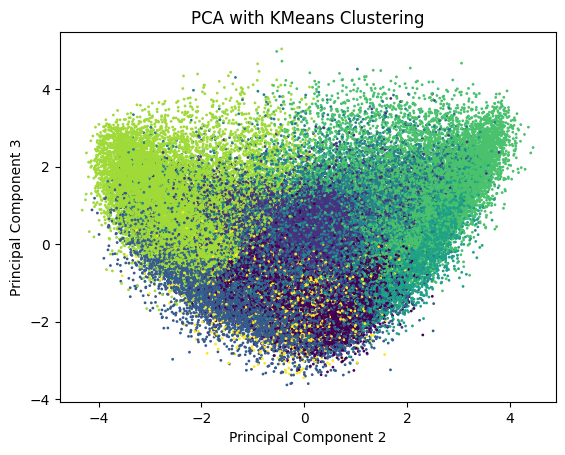

In [19]:
plt.scatter(X_pca[:, 2], X_pca[:, 3], c=labels, s=1)
plt.title('PCA with KMeans Clustering')
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 3')
plt.show()

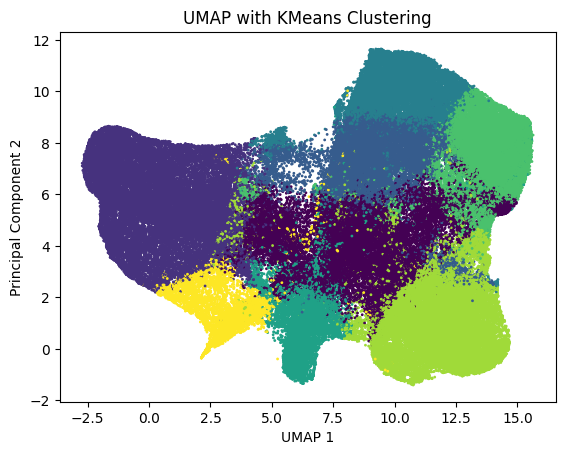

In [20]:
# Plot on UMAP
plt.scatter(umap_data[:, 0], umap_data[:, 1], c=labels, s=1)
plt.title('UMAP with KMeans Clustering')
plt.xlabel('UMAP 1')
plt.ylabel('Principal Component 2')
plt.show()

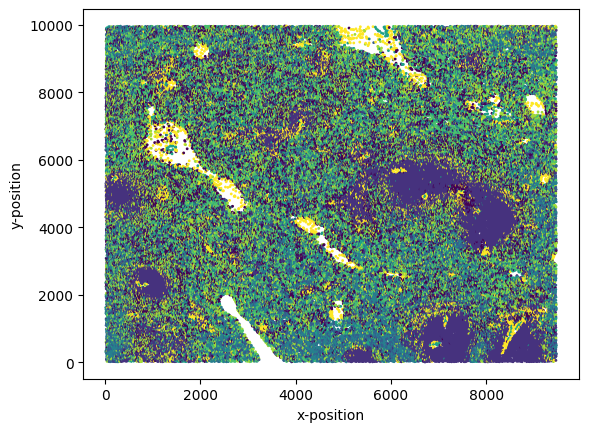

In [21]:
# Plot in tissue
plt.scatter(df_subset['x'], df_subset['y'], c=labels, s=1)
plt.xlabel('x-position')
plt.ylabel('y-position')
plt.show()

In [23]:
# Count the number of data points in each cluster
cluster_counts = np.bincount(labels)
print("Cluster Counts:", cluster_counts)

Cluster Counts: [23389 27920 14453 12866  9236 16198 22943  5135]


## Annotate clusters based on differentially upregulated genes

In [24]:
from scipy.stats import ranksums

# Group gene expression data by cluster labels
cluster_groups = X.groupby(labels)

# Perform one-sided Wilcoxon rank-sum test for each gene in each cell type
upregulated_genes = {}
for cell_type, group in cluster_groups:
    other_cells = X.drop(group.index)
    upregulated_genes[cell_type] = {}
    for gene in X.columns:
        _, p_value = ranksums(group[gene], other_cells[gene], alternative='greater')  # One-sided test for greater values
        if p_value < 0.05:  # TODO: apply multiple testing correction
            upregulated_genes[cell_type][gene] = p_value

# Print upregulated genes for each cell type
for cell_type, genes in upregulated_genes.items():
    print(f"\nUpregulated genes in cell type {cell_type}:")
    for gene, p_value in genes.items():
        print(f"{gene}: p-value = {p_value}")


Upregulated genes in cell type 0:
DAPI-02: p-value = 0.0

Upregulated genes in cell type 1:
CD20: p-value = 0.0
CD21: p-value = 0.0
CD34: p-value = 0.0
CD35: p-value = 0.0
DAPI-02: p-value = 0.0
PanCK: p-value = 7.877191358703684e-127
SMActin: p-value = 0.0

Upregulated genes in cell type 2:
CD107a: p-value = 0.0
CD11c: p-value = 0.0
CD15: p-value = 0.0
CD163: p-value = 0.0
CD1c: p-value = 0.0
CD21: p-value = 0.0
CD31: p-value = 3.1696157603309415e-112
CD35: p-value = 1.698577880455948e-09
CD3e: p-value = 0.0
CD4: p-value = 0.0
CD44: p-value = 0.0
CD45: p-value = 0.0
CD45RO: p-value = 0.0
CD5: p-value = 0.0
CD68: p-value = 0.0
CD8: p-value = 0.0
CollagenIV: p-value = 0.0
ECAD: p-value = 0.0
FoxP3: p-value = 0.0
HLA-DR: p-value = 0.0
Ki67: p-value = 0.0
Lyve1: p-value = 3.911821556330307e-10
PanCK: p-value = 0.0
Podoplanin: p-value = 0.0

Upregulated genes in cell type 3:
CD107a: p-value = 0.0
CD11c: p-value = 0.0
CD15: p-value = 0.0
CD163: p-value = 0.0
CD1c: p-value = 0.0
CD20: p-val

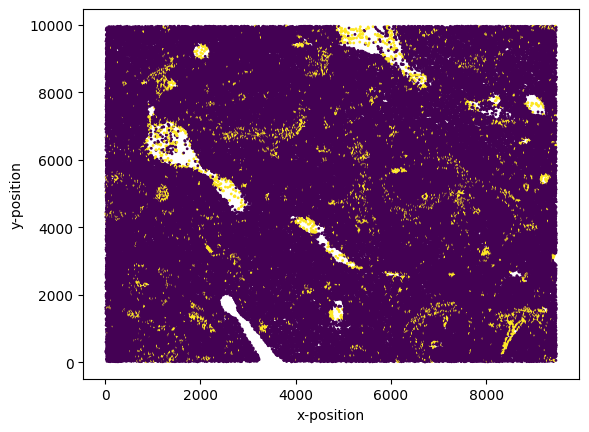

In [28]:
# Plot cluster that is likely vasculature
plt.scatter(df_subset['x'], df_subset['y'], c=labels == 7, s=1)
plt.xlabel('x-position')
plt.ylabel('y-position')
plt.show()

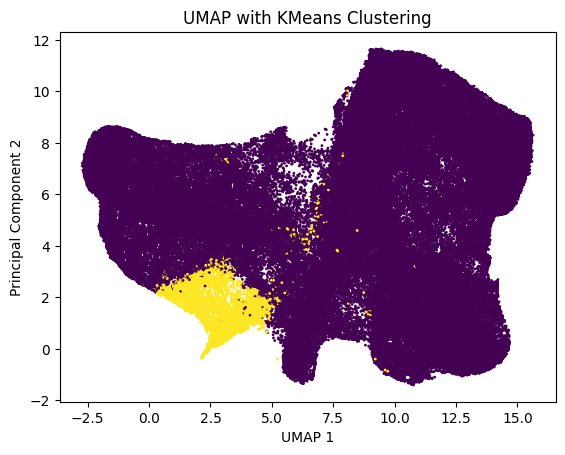

In [29]:
# Plot on UMAP
plt.scatter(umap_data[:, 0], umap_data[:, 1], c=labels == 7, s=1)
plt.title('UMAP with KMeans Clustering')
plt.xlabel('UMAP 1')
plt.ylabel('Principal Component 2')
plt.show()

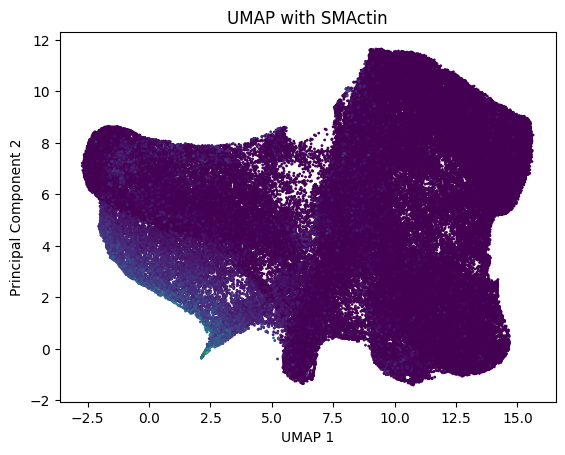

In [30]:
# Plot on UMAP
plt.scatter(umap_data[:, 0], umap_data[:, 1], c=X['SMActin'], s=1)
plt.title('UMAP with SMActin')
plt.xlabel('UMAP 1')
plt.ylabel('Principal Component 2')
plt.show()

In [31]:
from sklearn.neighbors import NearestNeighbors

positions = df_subset.drop(df_subset.columns[0], axis=1)
cell_types = labels

k = 100
# Initialize Nearest Neighbors model
nbrs = NearestNeighbors(n_neighbors=k+1, algorithm='auto').fit(positions)
distances, indices = nbrs.kneighbors(positions)

# Count the number of each cell-type in the neighborhood
neighborhood_counts = np.zeros((positions.shape[0], len(np.unique(cell_types))))
for i, neighbors in enumerate(indices):
    neighbor_types = cell_types[neighbors[1:]]  # Exclude the cell itself
    unique_types, type_counts = np.unique(neighbor_types, return_counts=True)
    neighborhood_counts[i, unique_types] = type_counts

print(neighborhood_counts)

[[ 8. 17. 17. ...  6. 12.  5.]
 [26.  7.  7. ... 10. 33.  1.]
 [21. 13. 11. ... 18. 21.  0.]
 ...
 [ 8.  6. 26. ... 18. 18.  0.]
 [13.  9. 12. ... 17. 14.  0.]
 [ 8.  4.  8. ... 28. 17.  2.]]


In [32]:
# Apply KMeans clustering for k=2 to split into white and red pulp
kmeans = KMeans(n_clusters=2, random_state=42)
neighborhoods = kmeans.fit_predict(neighborhood_counts)
neighborhoods

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

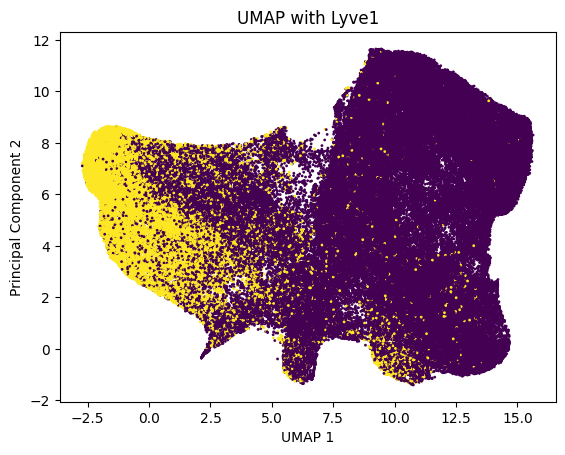

In [33]:
# Plot on UMAP
plt.scatter(umap_data[:, 0], umap_data[:, 1], c=neighborhoods, s=1)
plt.title('UMAP with Lyve1')
plt.xlabel('UMAP 1')
plt.ylabel('Principal Component 2')
plt.show()

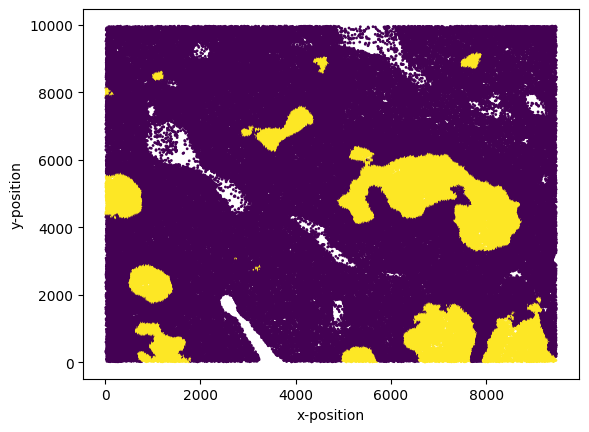

In [34]:
# Plot neighborhoods
plt.scatter(df_subset['x'], df_subset['y'], c=neighborhoods, s=1)
plt.xlabel('x-position')
plt.ylabel('y-position')
plt.show()

In [35]:
result = pd.crosstab(neighborhoods, labels==7) ## vasculature in different neighborhoods
print(result)

result_normalized = result.div(result.sum(axis=1), axis=0)
print(result_normalized)

## so more vasculature in white pulp than red pulp?

col_0   False  True 
row_0               
0      106431   3577
1       20574   1558
col_0     False     True 
row_0                    
0      0.967484  0.032516
1      0.929604  0.070396


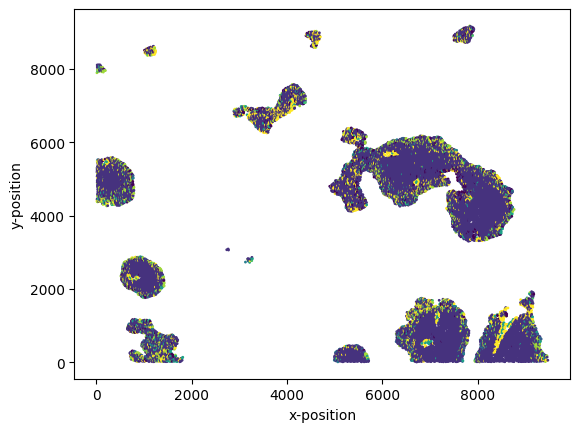

In [37]:
## focus on white pulp
positions_wp = positions[neighborhoods == 1]
wp_celltype = labels[neighborhoods == 1]

# Plot neighborhoods
plt.scatter(positions_wp['x'], positions_wp['y'], c=wp_celltype, s=1)
plt.xlabel('x-position')
plt.ylabel('y-position')
plt.show()

In [38]:
## grab each white pulp via clustering (will need to be improved)
from sklearn.cluster import DBSCAN

ftu = DBSCAN(eps=60, min_samples=5).fit(positions_wp).labels_
ftu

array([ 1,  0,  0, ..., 12, 12, 12])

In [39]:
# Ignore small ftus with < 100 cells; likely segmentation issue
unique_groups, counts = np.unique(ftu, return_counts=True)
group_counts = dict(zip(unique_groups, counts))
for i in range(len(ftu)):
    if group_counts[ftu[i]] < 100:
        ftu[i] = -1

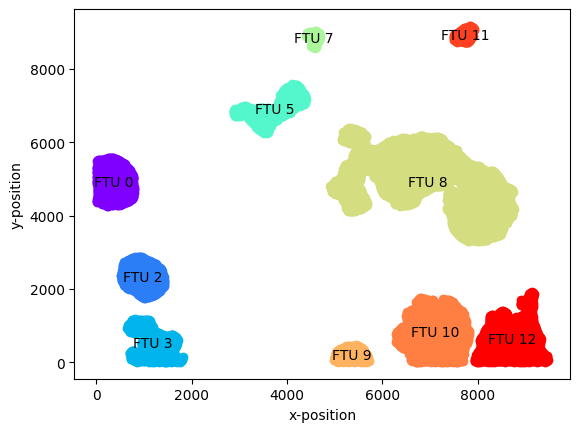

In [40]:
# Plot ftus 

# Define rainbow colors
num_groups = max(np.unique(ftu))+1
colors = plt.cm.rainbow(np.linspace(0, 1, num_groups))

# Plot each group
for group_id in np.unique(ftu):
    if(group_id != -1):
        group_indices = np.where(ftu == group_id)[0]
        group_positions = positions_wp.iloc[group_indices]
        centroid_x = group_positions['x'].mean()
        centroid_y = group_positions['y'].mean()
        plt.scatter(group_positions['x'], group_positions['y'], color=colors[group_id], label=f'FTU {group_id}')
        plt.text(centroid_x, centroid_y, f'FTU {group_id}', fontsize=10, ha='center', va='center')

# Set plot labels and legend
plt.xlabel('x-position')
plt.ylabel('y-position')
plt.show()

In [41]:
result = pd.crosstab(ftu, wp_celltype==7) ## vasculature in different ftus
print(result)

result_normalized = result.div(result.sum(axis=1), axis=0)
print(result_normalized)

col_0  False  True 
row_0              
-1       121     28
 0      1537     79
 2      1359     63
 3      1178     88
 5       967    225
 7       105     40
 8      9220    592
 9       429     16
 10     3203    203
 11      189     31
 12     2266    193
col_0     False     True 
row_0                    
-1     0.812081  0.187919
 0     0.951114  0.048886
 2     0.955696  0.044304
 3     0.930490  0.069510
 5     0.811242  0.188758
 7     0.724138  0.275862
 8     0.939666  0.060334
 9     0.964045  0.035955
 10    0.940399  0.059601
 11    0.859091  0.140909
 12    0.921513  0.078487


row_0
0     0.048886
2     0.044304
3     0.069510
5     0.188758
7     0.275862
8     0.060334
9     0.035955
10    0.059601
11    0.140909
12    0.078487
Name: True, dtype: float64


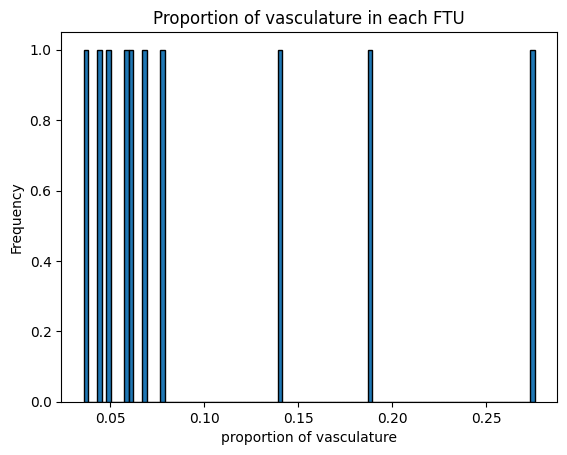

In [42]:
# Visualize results as a histogram
df = result_normalized[True]
df = df.drop(df.index[0]) # ignore group -1 (background)
print(df)

plt.hist(df, bins=100, edgecolor='black')
plt.xlabel('proportion of vasculature')
plt.ylabel('Frequency')
plt.title('Proportion of vasculature in each FTU')
plt.show()

In [46]:
print(np.mean(result_normalized[True]))
print(np.median(result_normalized[True]))

0.10822967746827244
0.06951026856240126
